In [1]:
import pandas as pd

In [4]:
# Load the dataset
real_estate_data = pd.read_csv('Real_Estate.csv')

#Display the first few rows of the dataset and the info about the dataset
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

In [5]:
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [6]:
descriptive_stats = real_estate_data.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

In [8]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 59.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


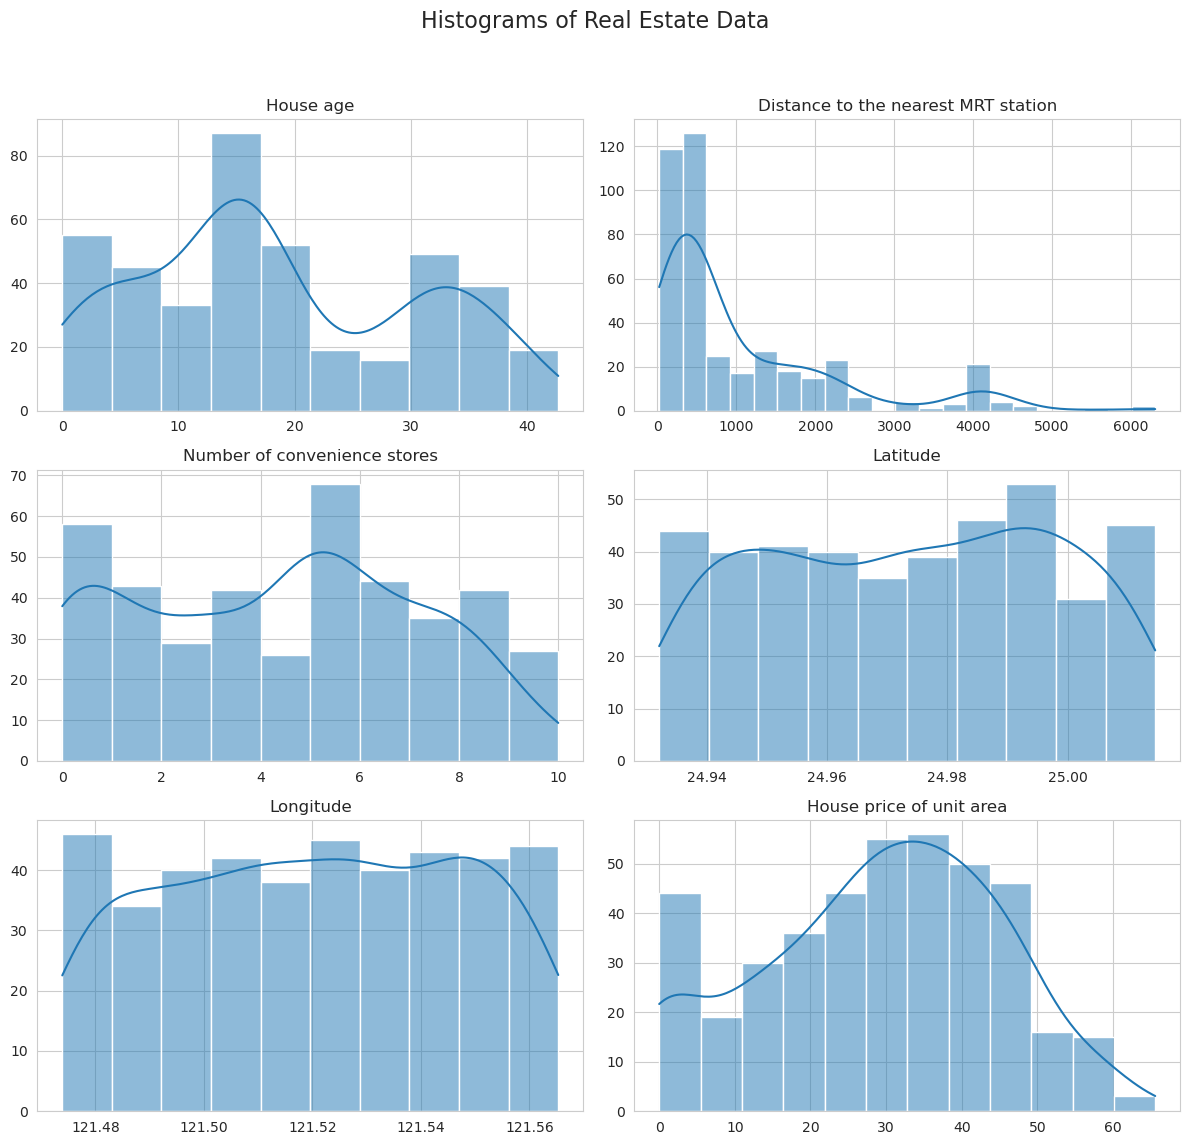

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for numericals columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age' , 'Distance to the nearest MRT station' , 'Number of convenience stores' , 'Latitude' , 'Longitude' , 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

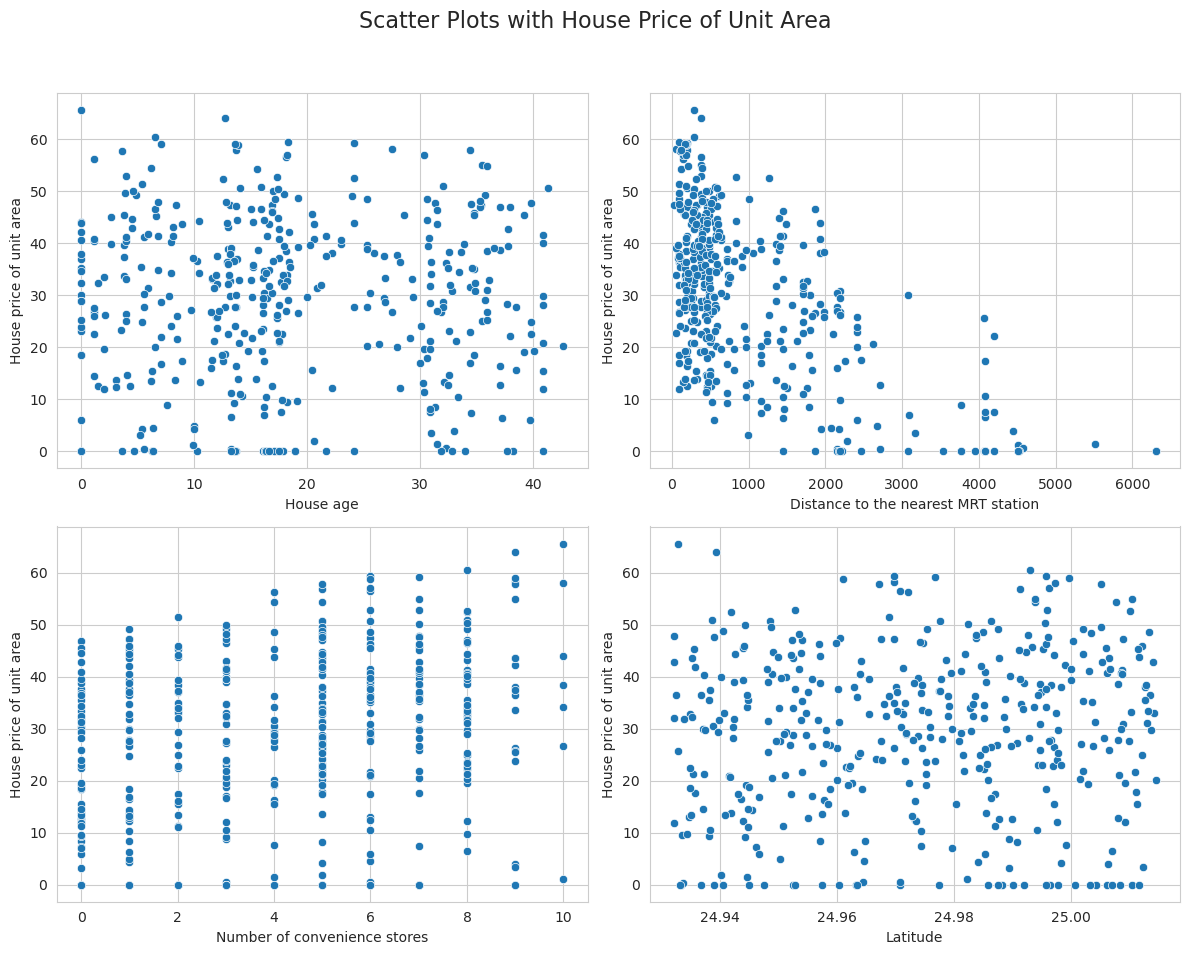

In [18]:
# Scatter plots to observe the realtionship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area' , fontsize=16)

# Scatter Plot for eacch variable against the house price
sns.scatterplot(data=real_estate_data, x='House age' , y= 'House price of unit area' , ax=axes[0,0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station' , y='House price of unit area', ax=axes[0,1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1,0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipykernel_110/3063758740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_estate_data.corr()


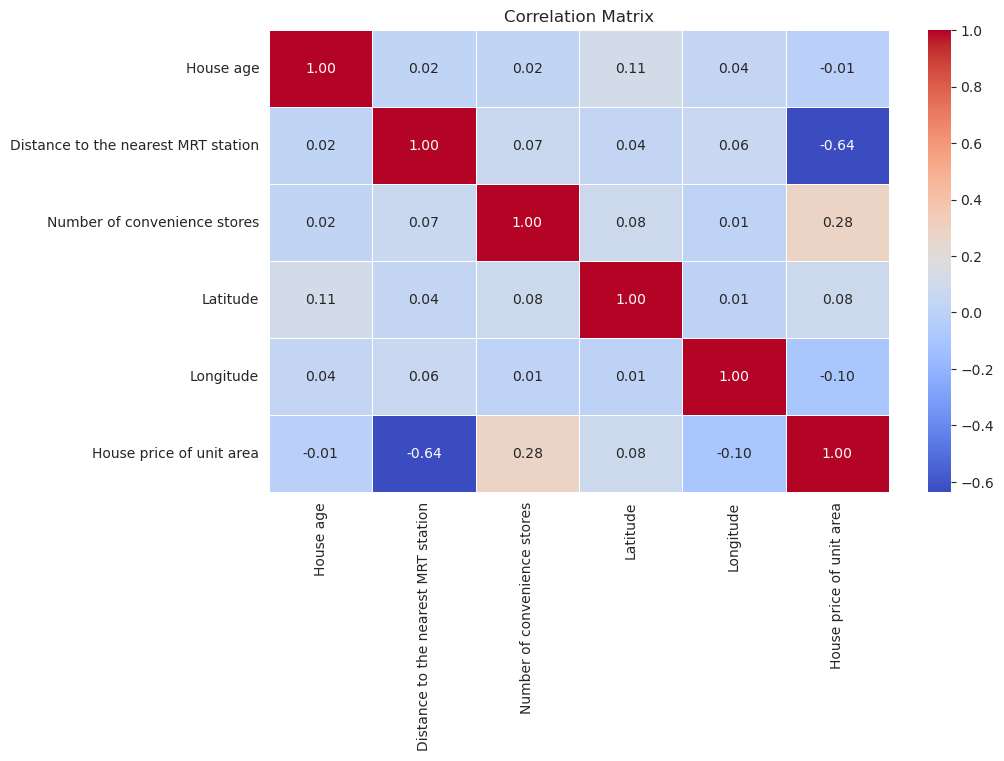

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [20]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

#Plotting the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' , fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccting feature and target Variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores' , 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into trainning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

#Training the model
model.fit(X_train, y_train)

LinearRegression()

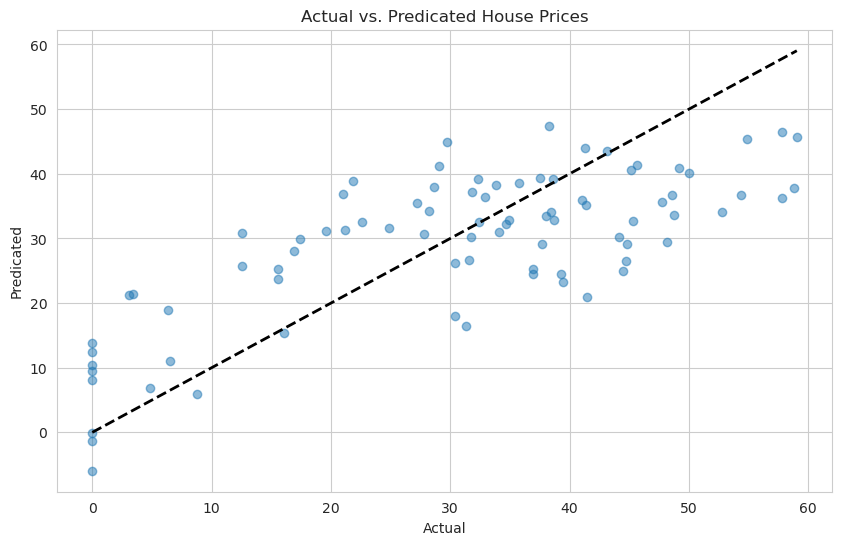

In [23]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualiztion: Actual vs PReddicted Values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicated')
plt.title('Actual vs. Predicated House Prices')
plt.show()